This is a sample problem utilizing Facebook's Prophet API for time-series forecasting.  In the example below I utilized the El Nino Data Set (TAO-all) available at https://archive.ics.uci.edu/ml/datasets/El+Nino

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet as ph
import datetime as dt
import numpy as np
import pylab
import statsmodels.api as sm

The data originally has a separate file that supplies the column headers.  I collected that information and created a list below to rename those column headers removing the spacing and the periods from the name.

In [5]:
colnames=['obs',
'year',
'month',
'day',
'date',
'latitude',
'longitude',
'zon_winds',
'mer_winds',
'humidity',
'air_temp',
's_s_temp']
df=pd.read_csv("scikit_learn_data/tao-all_format.csv", index_col=False, names=colnames, engine='python', infer_datetime_format=True, error_bad_lines=False, header=None, 
               dtype={'obs':np.int64, 'year':np.int64, 'month':np.int64, 'day':np.int64, 'date':dt.datetime, 'latitude': np.float64, 'longitude':np.float64,
                     'zon_winds':object, 'mer_winds':object, 'humidity':object, 'air_temp': object, 's_s_temp':object})

In [6]:
#Looking at the datatypes for the dataframe
df.dtypes

obs            int64
year           int64
month          int64
day            int64
date          object
latitude     float64
longitude    float64
zon_winds     object
mer_winds     object
humidity      object
air_temp      object
s_s_temp      object
dtype: object

In [7]:
#slicing just the data and the air temp data from this set than renaming the columns to match the Prophet requirements

df_airtemp=df[['date', 'air_temp']]
df_airtemp.rename(columns={'date':'ds', 'air_temp':'y'}, inplace=True)

#converting the airtemp data into numeric rather than string
df_airtemp['y']=pd.to_numeric(df_airtemp['y'], errors='coerce')

#dropping NANs from data, prophet is adept at dealing with missing data!
df_airtemp=df_airtemp.dropna()

/Users/justin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/Users/justin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


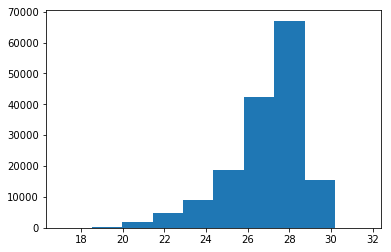

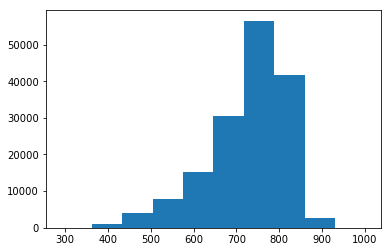

In [8]:
#Checking the skewness of the temperature data.  It appears skewed so lets log transform it 
plt.clf()
_=plt.hist(df_airtemp['y'])
plt.show()
#lets test what the distribution would look like after a transformation
plt.clf()
_=plt.hist((df_airtemp['y'])**2)
plt.show()
#looks better, it may not be necessary but lets transform y using square
df_airtemp['y']=(df_airtemp['y']**2)

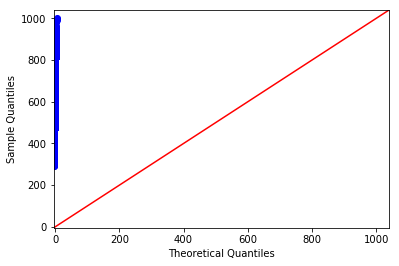

In [9]:
plt.clf()
sm.qqplot(df_airtemp['y'], line='45')
pylab.show()


In [10]:
#coercing the date(ds) column into a datetime object for later slicing
df_airtemp['ds']=pd.to_datetime(df_airtemp['ds'])
#taking a peek at the data to see how it turned out
df_airtemp.head()

,ds,y
0,1980-03-07,683.2996
1,1980-03-08,658.4356
2,1980-03-09,659.9761
3,1980-03-10,653.8249
4,1980-03-11,640.0900


In [11]:
#slicing the data right before the last year into order to compare prediction to actual
df_airtemp97=df_airtemp[df_airtemp['ds'] < dt.datetime(1997,6,1)]
#instantiating the Prophet model and fitting it to the sample set
m_air=ph.Prophet()
m_air.fit(df_airtemp97)

In [17]:
future_temp=m_air.make_future_dataframe(freq='D', periods=365*2)
forecast_temp=m_air.predict(future_temp)

In [18]:
_=forecast_temp.plot(figsize=(20,10))

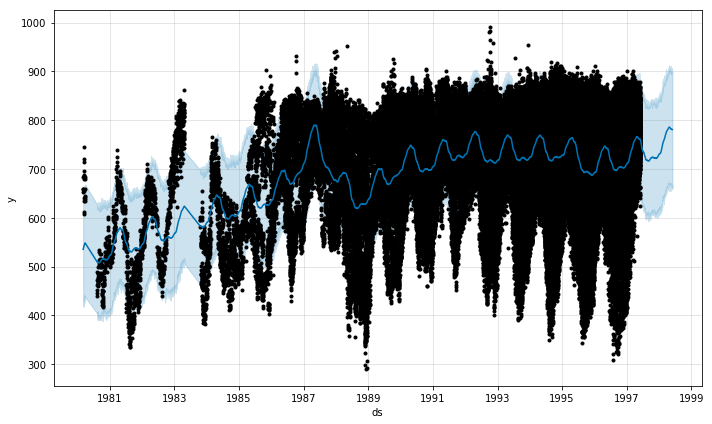

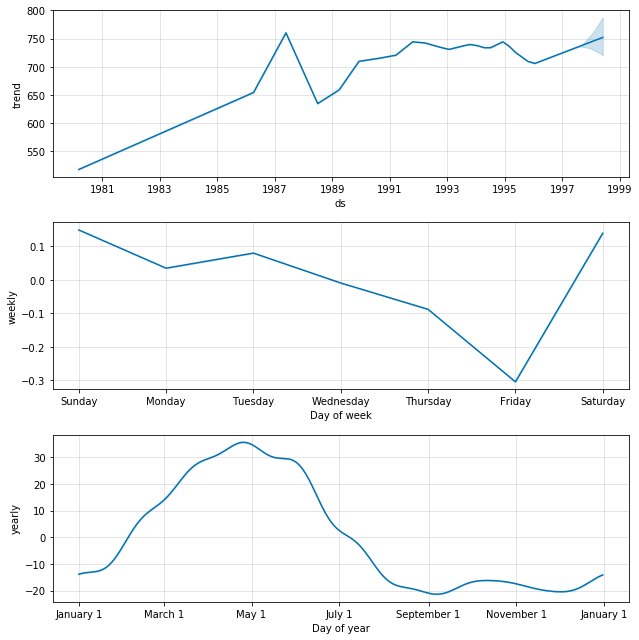

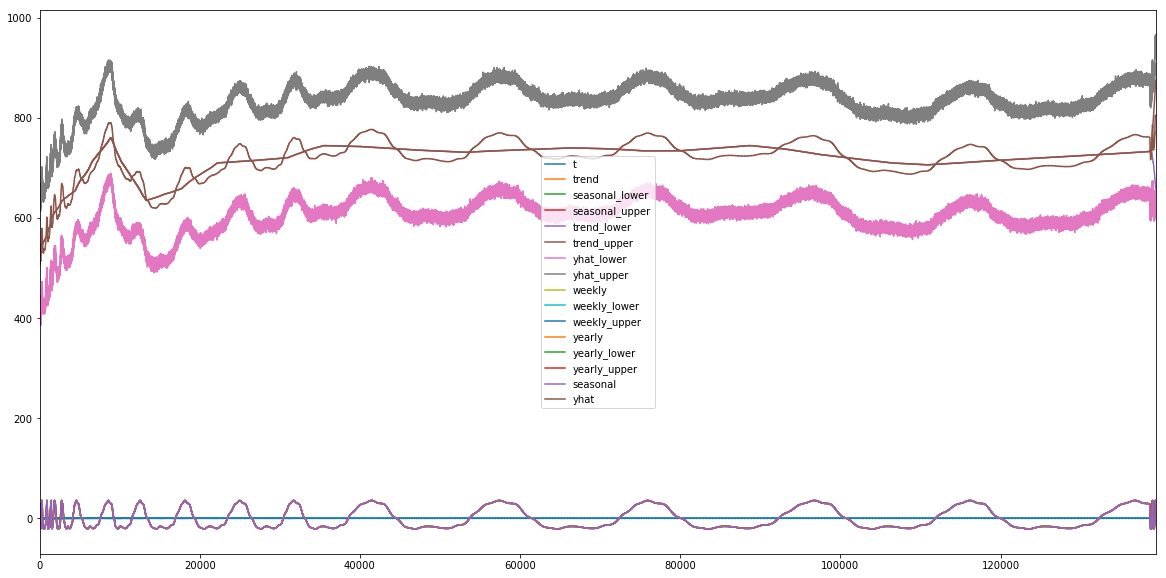

In [19]:
plt.show()

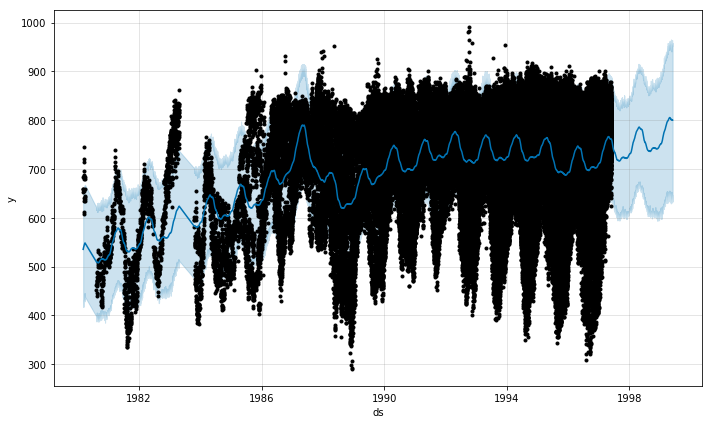

In [20]:
m_air.plot(forecast_temp)

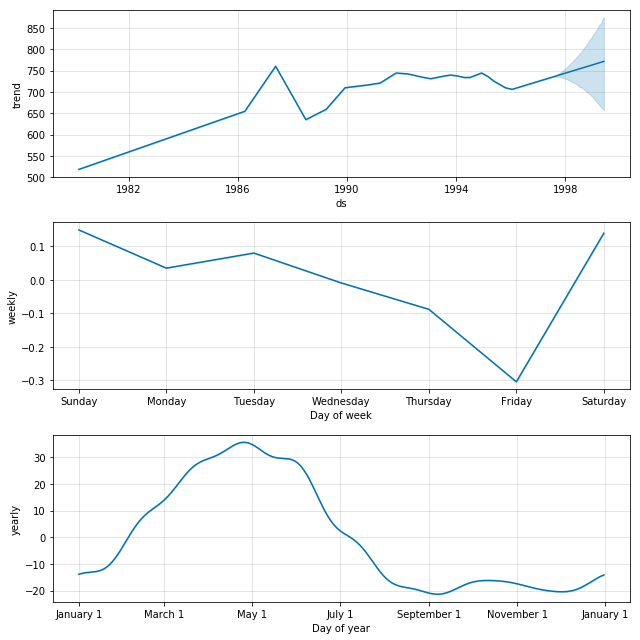

In [21]:
m_air.plot_components(forecast_temp)